In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [239]:
df = pd.read_csv('jamboree.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Define Problem Statement and perform Exploratory Data Analysis

## Definition of problem (as per given problem statement with additional views)

jamboree recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

**Problem Statement**

1. Jamboree wants to understand  what factors are important in graduate admissions
2. how these factors are interrelated among themselves.


## Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.

In [240]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [241]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [243]:
df = df.drop(columns = ['Serial No.'])

## Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)

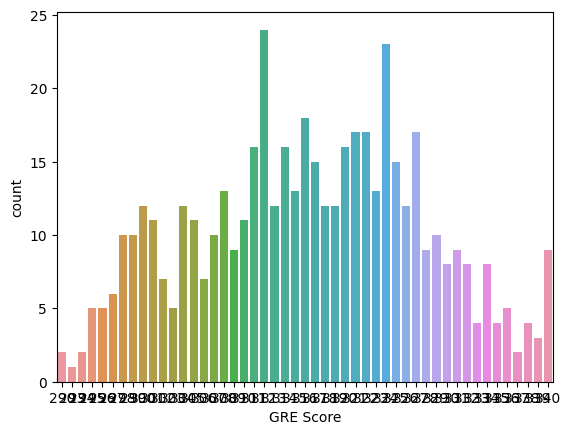

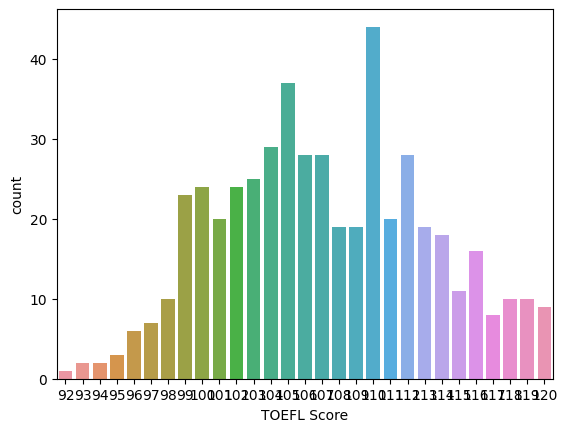

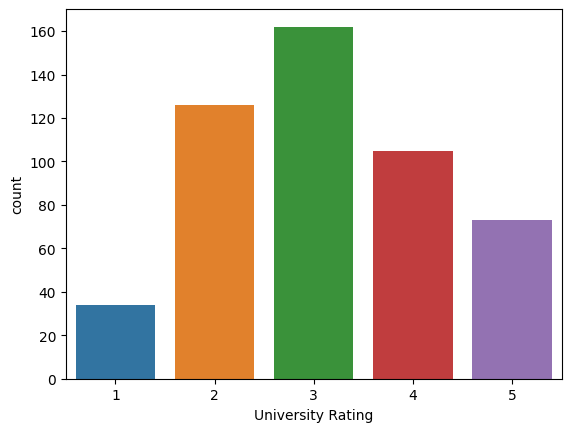

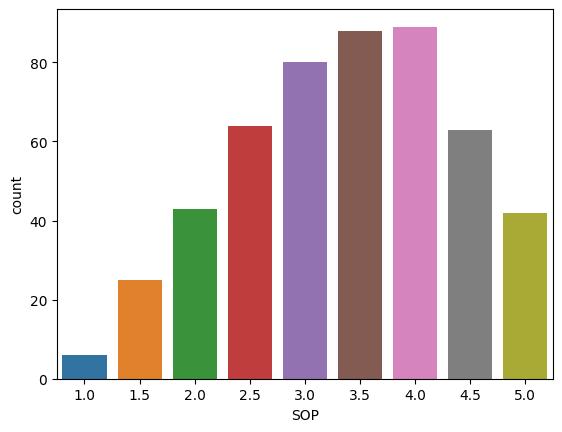

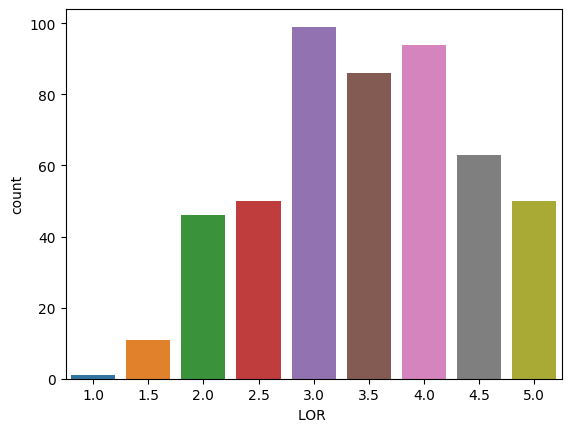

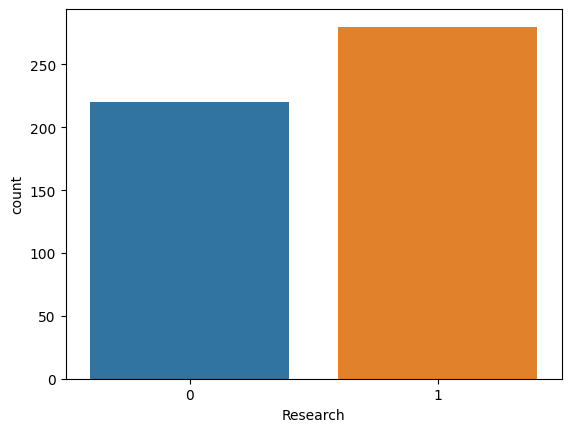

In [244]:
from random import sample

for col in df.columns:
  if col in ["CGPA", "Chance of Admit "]:
    continue
  sns.countplot(data = df, x = df[col])
  plt.show()

* "GRE Score", "TOEFEL Score" forming normal distribution showing that mean marks are high for most of the students
* "SOP", "LOR" are forming kind of left skewed data showing most of the values are on right side

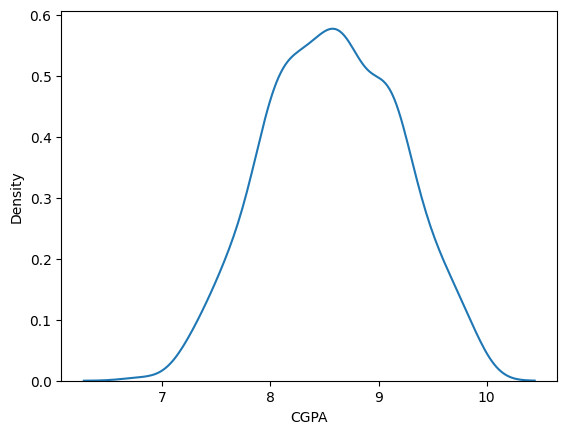

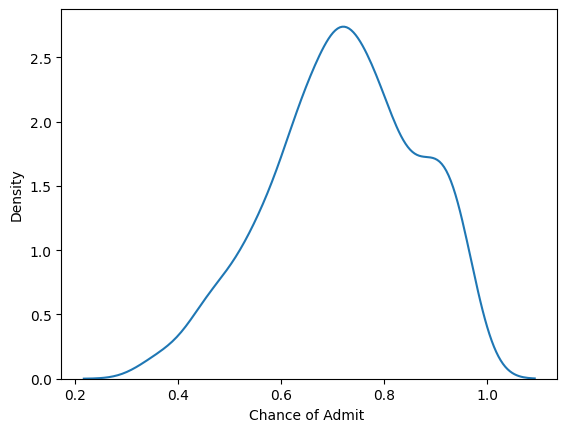

In [245]:
for col in ["CGPA", "Chance of Admit "]:
  sns.kdeplot(data = df, x = df[col])
  plt.show()

* "CGPA", "Chance of Admit" are following Normal Distribution showing mean CGPA more for most of the students and chance of admit is also high.

## Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.

In [246]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

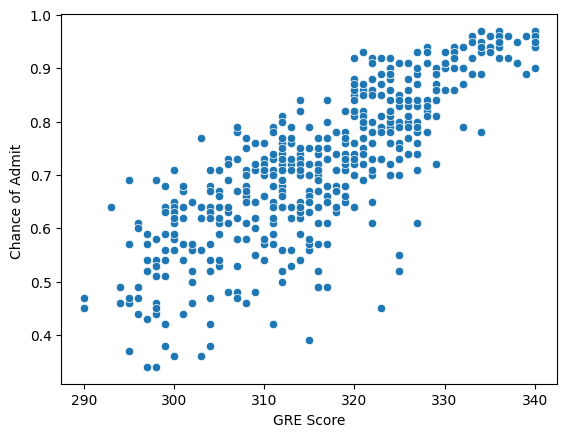

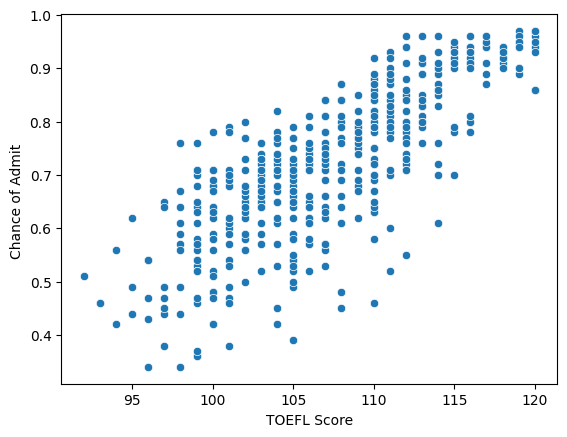

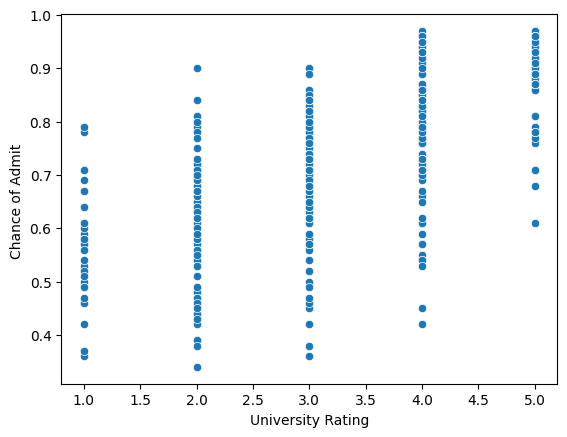

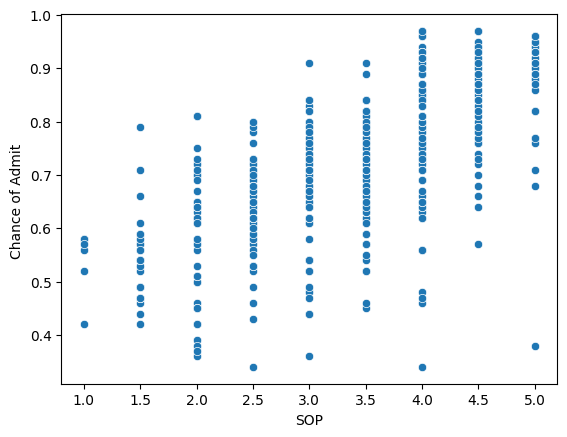

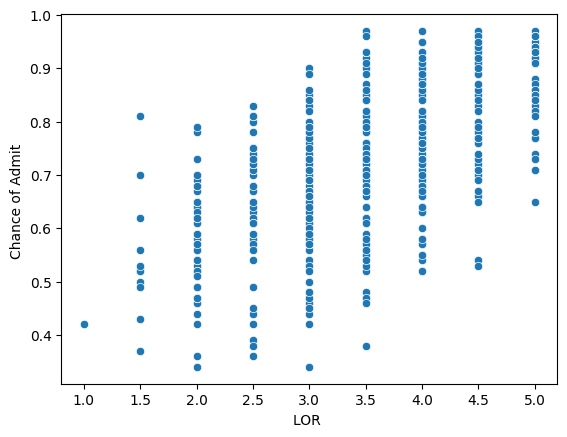

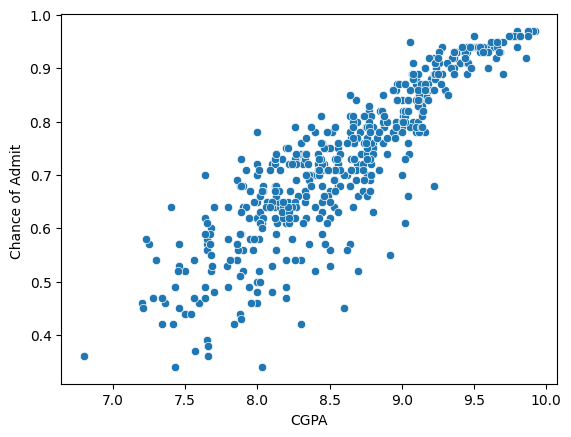

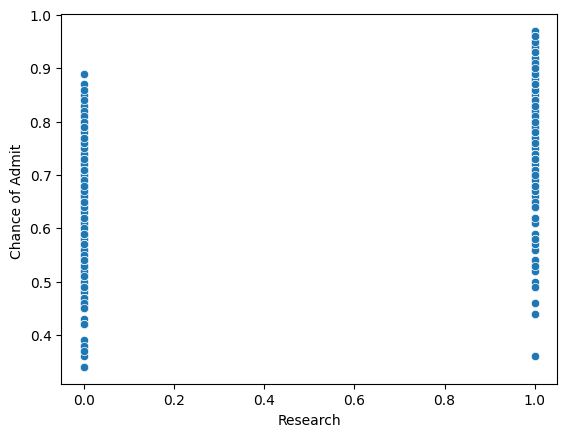

In [247]:
for col in df.columns[:-1]:
  sns.scatterplot(data = df, x = df[col], y = df['Chance of Admit '])
  plt.show()

* "GRE Score", "TOEFL Score", "CGPA" are more linear towards chance of admit showing as the scores increases selection of candidate gradually increases.

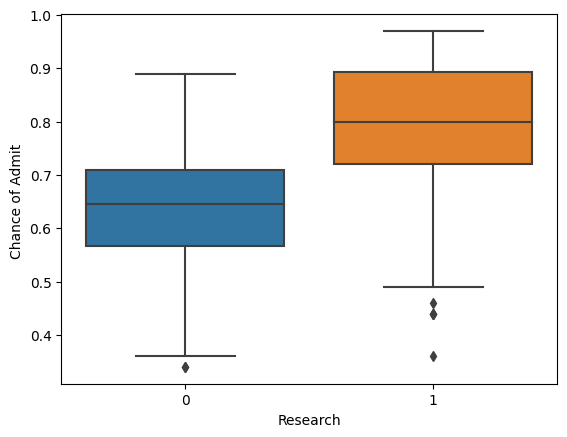

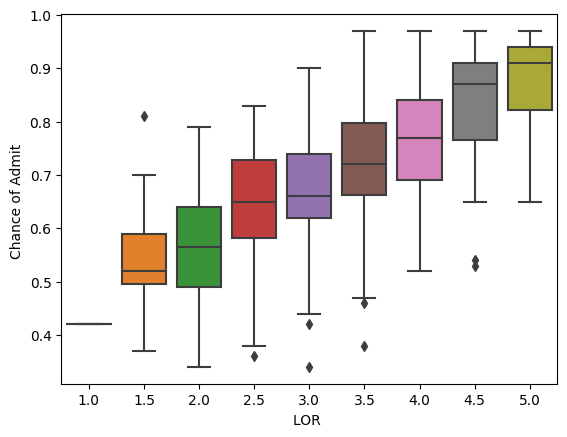

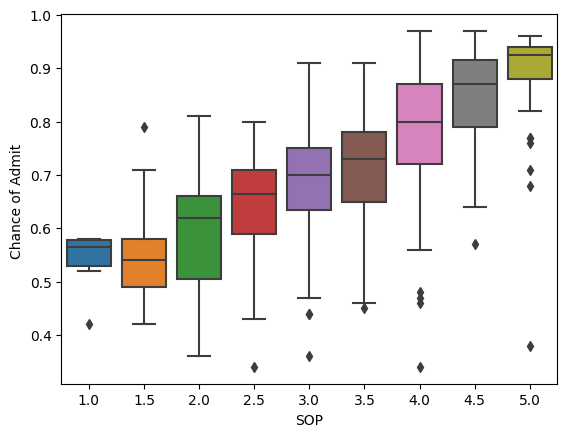

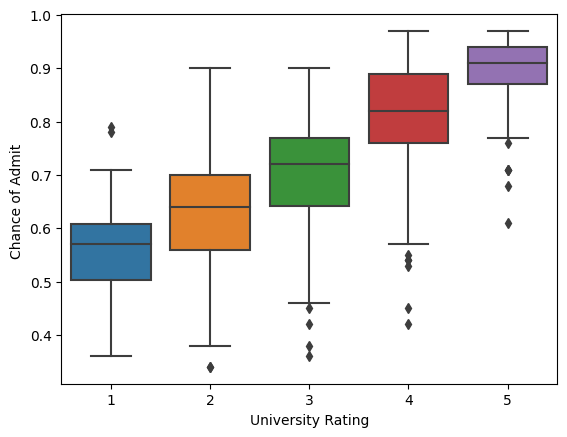

In [248]:
for col in ['Research', 'LOR ', 'SOP', 'University Rating']:
  sns.boxplot(data = df, x = df[col], y = df['Chance of Admit '])
  plt.show()

* Apart from 'Research'. 'LOR ', 'SOP', 'University Rating' had a gud impact on selection process as this increases the chance of admit also increases

## Insights based on ED

### Comments on range of attributes, outliers of various attributes

In [249]:
data = []
for att in df.columns:
  if df[att].dtype in ('int64', 'float64'):

    obj = {}

    obj['Attributes'] = att
    obj['Min_Value'] = df[att].min()
    obj['Mean'] = df[att].mean()
    obj['Max_Value'] = df[att].max()

    data.append(obj)


pd.DataFrame(data)


,Attributes,Min_Value,Mean,Max_Value
0,GRE Score,290.00,316.47200,340.00
1,TOEFL Score,92.00,107.19200,120.00
2,University Rating,1.00,3.11400,5.00
3,SOP,1.00,3.37400,5.00
4,LOR,1.00,3.48400,5.00
5,CGPA,6.80,8.57644,9.92
6,Research,0.00,0.56000,1.00
7,Chance of Admit,0.34,0.72174,0.97


### Comments on the distribution of the variables and relationship between them

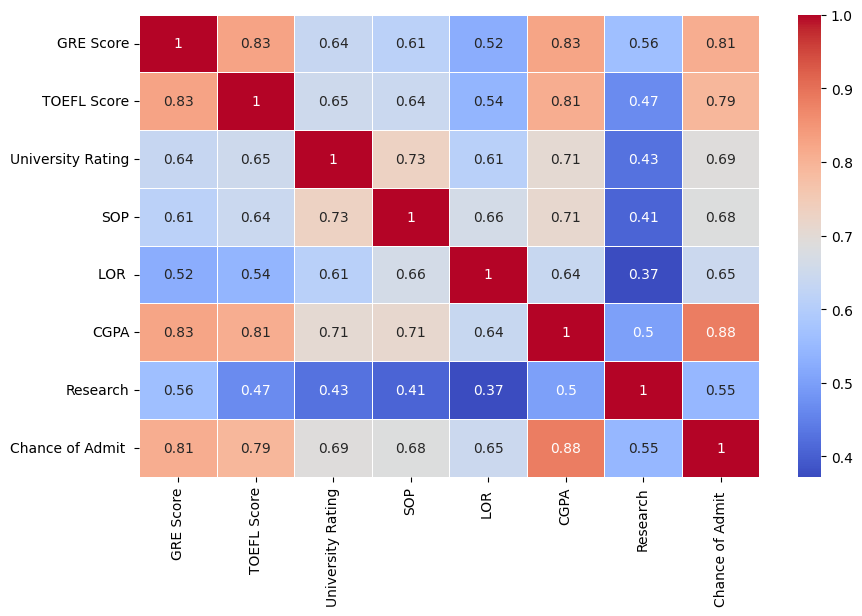

In [250]:
plt.figure(figsize = (10, 6))
sns.heatmap( df.corr() , annot=True,linewidth = 0.5 , cmap = 'coolwarm')
plt.show()

* GRE Score, CGPA, Chance of Admit are highly correlated with each other
* TOEFL Score, CGPA, chance of  Admit are highly correlated with each other
* Research,  CGPA, Chance of Admit are less correlated

# Data Preprocessing

In [251]:
# No duplicates found

df[df.duplicated()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [252]:
# No missing values found

df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

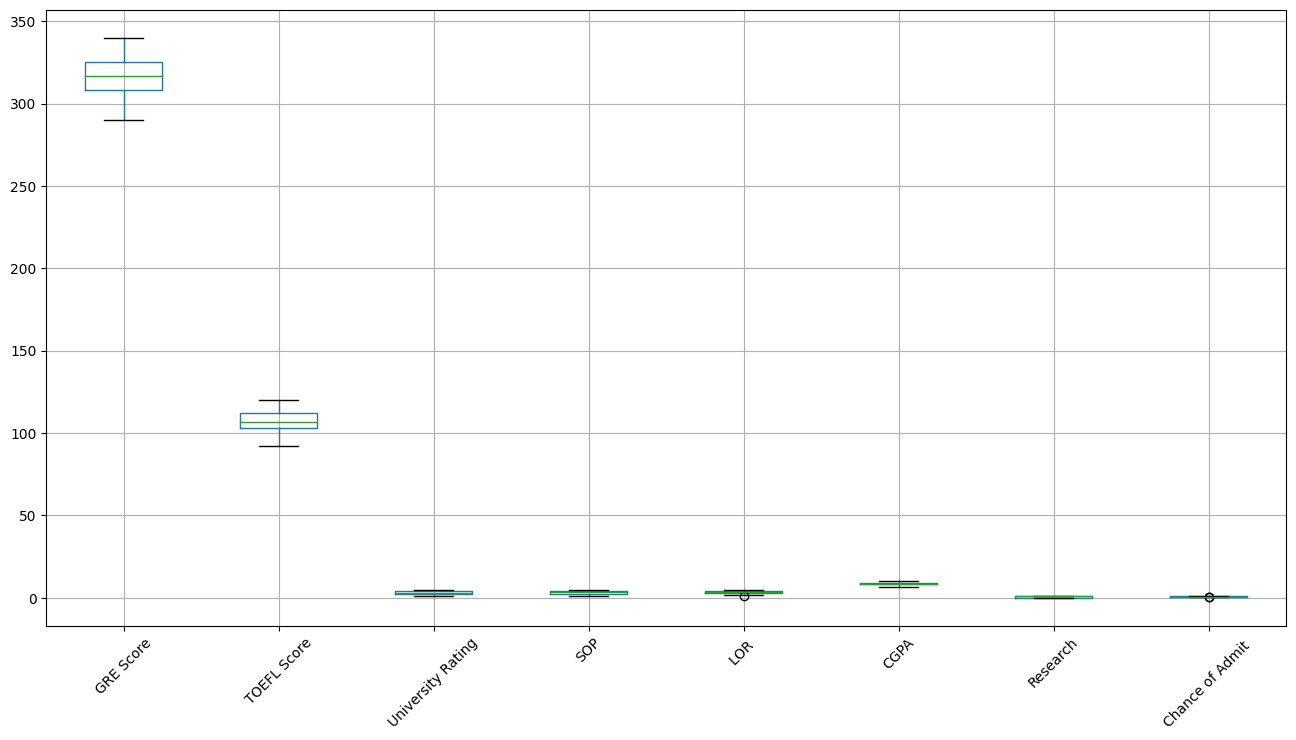

In [253]:
# Outliers Detection

plt.figure(figsize = (16, 8))
df.boxplot()
plt.xticks(rotation = 45)
plt.show()

In [254]:
# Outliers Detection

outliers_ls = []
for col in df.columns:
  obj = {}

  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)

  iqr = q3 - q1

  lower = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr

  obj['Attributes'] = col
  obj["lower"] = lower
  obj['upper'] = upper

  outliers_ls.append(obj)

outliers = pd.DataFrame(outliers_ls)
outliers

,Attributes,lower,upper
0,GRE Score,282.50000,350.50000
1,TOEFL Score,89.50000,125.50000
2,University Rating,-1.00000,7.00000
3,SOP,0.25000,6.25000
4,LOR,1.50000,5.50000
5,CGPA,6.75875,10.40875
6,Research,-1.50000,2.50000
7,Chance of Admit,0.34500,1.10500


In [255]:
for i in outliers_ls:

  for idx in range(len(df[i['Attributes']])):
    if df[i['Attributes']].iloc[idx] < i['lower']:
      df[i['Attributes']].iloc[idx] = i['lower']

  for idx in range(len(df[i['Attributes']])):
    if df[i['Attributes']].iloc[idx] > i['upper']:
      df[i['Attributes']].iloc[idx] = i['upper']

<ipython-input-255-54e0f8e0ab3a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i['Attributes']].iloc[idx] = i['lower']


In [256]:
# Oulier treatment has been performed using IQR method

for i in outliers_ls:
  print(i['Attributes'], np.sum(i['lower'] > df[i['Attributes']]) + np.sum(i['upper'] < df[i['Attributes']]))


GRE Score 0
TOEFL Score 0
University Rating 0
SOP 0
LOR  0
CGPA 0
Research 0
Chance of Admit  0


# Model building

In [257]:
from sklearn.model_selection import train_test_split

x = df.drop(['Chance of Admit '], axis = 1)
y = df['Chance of Admit ']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(400, 7) (400,)
(100, 7) (100,)


In [258]:
#Standarization

from sklearn.preprocessing import StandardScaler
x_train_columns=x_train.columns
x_train_std = StandardScaler().fit_transform(x_train)
x_train = pd.DataFrame(x_train_std, columns = x_train_columns)

In [259]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [260]:
# Build a Linear Regression Model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

print("Model Coefficient for Linear Regression with respect to column names")
print()
for i in range(len(model.coef_)):
  print(df.columns[i], '----->', model.coef_[i])

Model Coefficient for Linear Regression with respect to column names

GRE Score -----> 0.01994444289035572
TOEFL Score -----> 0.014336889416974773
University Rating -----> 0.004121241950939589
SOP -----> 0.0013651691014564017
LOR  -----> 0.016321439669792416
CGPA -----> 0.0766064110457694
Research -----> 0.013066296761590698


In [261]:
# Build a Ridge and Lasso Regresison

from sklearn.linear_model import Lasso

model = LinearRegression()
model.fit(x_train, y_train)

print("Model Coefficient for Lasso with respect to column names")
print()
for i in range(len(model.coef_)):
  print(df.columns[i], '----->', model.coef_[i])

Model Coefficient for Lasso with respect to column names

GRE Score -----> 0.01994444289035572
TOEFL Score -----> 0.014336889416974773
University Rating -----> 0.004121241950939589
SOP -----> 0.0013651691014564017
LOR  -----> 0.016321439669792416
CGPA -----> 0.0766064110457694
Research -----> 0.013066296761590698


In [262]:
from sklearn.linear_model import Lasso,Ridge,LinearRegression

model1 = LinearRegression()
model1.fit(x_train, y_train)

model2 = Lasso(alpha = 1.0)
model2.fit(x_train, y_train)

model3 = Ridge(alpha = 0.5)
model3.fit(x_train, y_train)

data = []

for i in range(len(df.columns)-1):
  obj = {}
  obj['Columns'] = df.columns[i]
  obj['Linear Regression'] = model1.coef_[i]
  obj['Lasso Regression'] = model2.coef_[i]
  obj['Ridge Regression'] = model3.coef_[i]

  data.append(obj)
pd.DataFrame(data)

,Columns,Linear Regression,Lasso Regression,Ridge Regression
0,GRE Score,0.019944,0.0,0.020056
1,TOEFL Score,0.014337,0.0,0.014436
2,University Rating,0.004121,0.0,0.004175
3,SOP,0.001365,0.0,0.001452
4,LOR,0.016321,0.0,0.016338
5,CGPA,0.076606,0.0,0.076229
6,Research,0.013066,0.0,0.013063


# Testing the assumptions of the linear regression model

## Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5)

In [263]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset,col):
    dataset=dataset.drop(columns=col,axis=1)
    vif=pd.DataFrame()
    vif['features']=dataset.columns
    vif['VIF_Value']=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    return vif

In [264]:
x_train.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [265]:
for col in x_train.columns:
  print('******* VIF when', col, 'is dropped *******')
  print(calculate_vif(x_train.drop(columns = [col]), []))
  print('------------------------------')

******* VIF when GRE Score is dropped *******
            features  VIF_Value
0        TOEFL Score   3.149370
1  University Rating   2.627600
2                SOP   2.869083
3               LOR    2.032569
4               CGPA   4.037364
5           Research   1.387053
------------------------------
******* VIF when TOEFL Score is dropped *******
            features  VIF_Value
0          GRE Score   3.416138
1  University Rating   2.605096
2                SOP   2.860807
3               LOR    2.035877
4               CGPA   4.452613
5           Research   1.500374
------------------------------
******* VIF when University Rating is dropped *******
      features  VIF_Value
0    GRE Score   4.220387
1  TOEFL Score   3.857492
2          SOP   2.426978
3         LOR    2.017318
4         CGPA   4.755349
5     Research   1.492852
------------------------------
******* VIF when SOP is dropped *******
            features  VIF_Value
0          GRE Score   4.215699
1        TOEFL Score   3.

* VIF when GRE Score is dropped we get an optimal VIF across all features

features      VIF_Value
0.        TOEFL Score                                    2.936391
1.  University Rating   2.458293
2.                SOP   2.709989
3.               LOR    1.937680
4.               CGPA   3.882169
5.           Research   1.388522








In [266]:
x_train_new = x_train.drop(columns = ['GRE Score'])
x_train_new.head()

,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.639730,0.774597,0.640313,1.106291,0.888342,0.890911
1,-0.334478,-0.946729,-1.364581,-1.023752,-0.194102,-1.122447
2,-0.659214,0.774597,-0.362134,-1.023752,-0.899330,0.890911
3,0.314994,-0.086066,0.139090,0.573780,0.330719,0.890911
4,1.126834,1.635260,0.640313,0.573780,1.691974,0.890911


In [267]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
218,324,110,4,3.0,3.5,8.97,1
187,335,118,5,4.5,3.5,9.44,1
147,326,114,3,3.0,3.0,9.11,1
171,334,117,5,4.0,4.5,9.07,1
311,328,108,4,4.5,4.0,9.18,1
...,...,...,...,...,...,...,...
1,324,107,4,4.0,4.5,8.87,1
292,302,99,2,1.0,2.0,7.97,0
326,299,100,3,2.0,2.0,8.02,0
174,321,111,4,4.0,4.0,8.97,1


In [271]:
x_test_std = StandardScaler().fit_transform(x_test)
x_test_columns = x_test.columns
x_test = pd.DataFrame(x_test_std,columns=x_test_columns)
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.572508,0.399929,0.783891,-0.443848,-0.094703,0.622264,0.868554
1,1.562694,1.803187,1.728339,1.122673,-0.094703,1.431966,0.868554
2,0.752541,1.101558,-0.160556,-0.443848,-0.686595,0.863452,0.868554
3,1.472677,1.627780,1.728339,0.600500,1.089082,0.794541,0.868554
4,0.932575,0.049114,0.783891,1.122673,0.497189,0.984046,0.868554
...,...,...,...,...,...,...,...
95,0.572508,-0.126293,0.783891,0.600500,1.089082,0.449987,0.868554
96,-1.407865,-1.529552,-1.105004,-2.532542,-1.870379,-1.100505,-1.151339
97,-1.677915,-1.354144,-0.160556,-1.488195,-1.870379,-1.014367,-1.151339
98,0.302457,0.575336,0.783891,0.600500,0.497189,0.622264,0.868554


In [280]:
x_test_res =sm.add_constant(x_test)
x_test_new = x_test.drop(columns = ['GRE Score'])
x_test_res = x_test_res.drop(columns = ['GRE Score'])
x_test_res.head()

,const,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.0,0.399929,0.783891,-0.443848,-0.094703,0.622264,0.868554
1,1.0,1.803187,1.728339,1.122673,-0.094703,1.431966,0.868554
2,1.0,1.101558,-0.160556,-0.443848,-0.686595,0.863452,0.868554
3,1.0,1.627780,1.728339,0.600500,1.089082,0.794541,0.868554
4,1.0,0.049114,0.783891,1.122673,0.497189,0.984046,0.868554


## The mean of residuals is nearly zero

In [281]:
x_train_res.shape, x_test_res.shape

((400, 7), (100, 7))

In [282]:
import statsmodels.api as sm


x_train_res = sm.add_constant(x_train_new)
model1 = sm.OLS(y_train.values, x_train_res).fit()

pred = model1.predict(x_test_res)

residuals = y_test.values - pred
mean_residuals = np.mean(residuals)

print("Mean of Residuals {}".format(mean_residuals))


Mean of Residuals 0.010549999999999672


## Linearity of variables (no pattern in the residual plot)

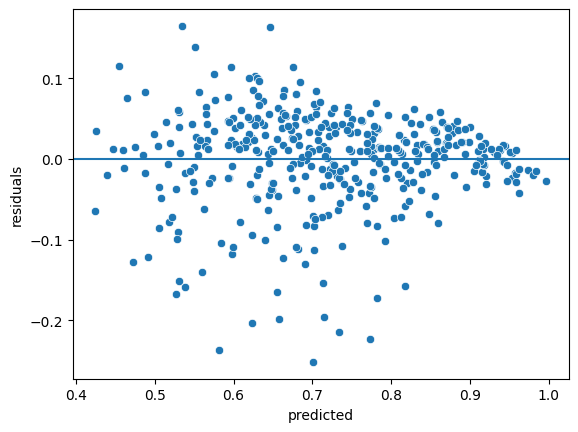

In [284]:

# create a DataFrame of predicted values and residuals
df["predicted"] = model1.predict(x_train_res)
df["residuals"] = model1.resid
sns.scatterplot(data=df, x="predicted", y="residuals")
plt.axhline(y=0)

## Test for Homoscedasticity

(0.0, 1.0)

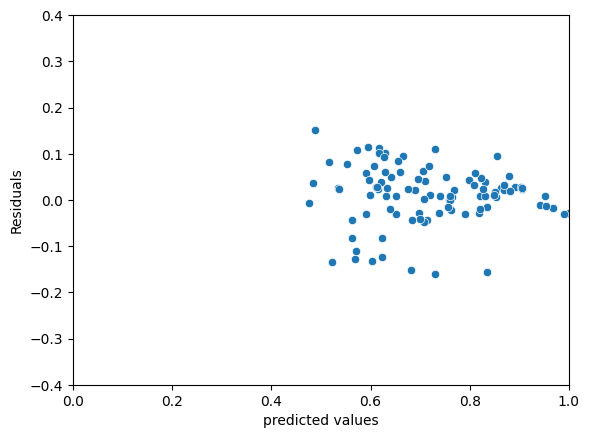

In [285]:
import seaborn as sns
p = sns.scatterplot(x=pred,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)

In [293]:
import statsmodels.stats.api as sns
from statsmodels.compat import lzip
name=['F statistics','p-value']
test=sns.het_goldfeldquandt(residuals,x_test_res)
lzip(name,test)

[('F statistics', 0.7495524563327747), ('p-value', 0.8259027485354253)]

Here null hypothesis is - error terms are homoscedastic and since p-values >0.05, we fail to reject the null hypothesis

## Normality of residuals

Text(0, 0.5, 'y_pred')

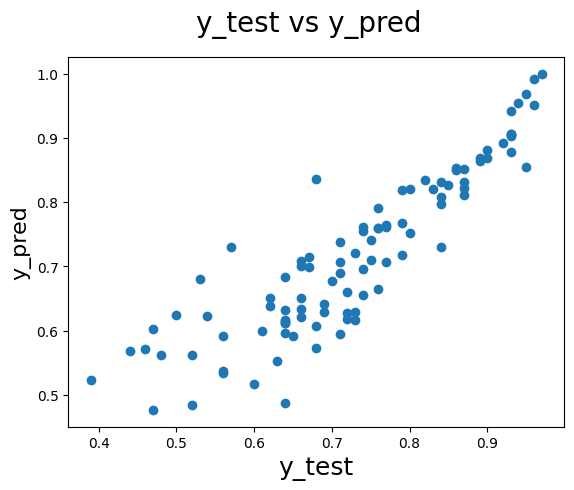

In [288]:
fig = plt.figure()
plt.scatter(y_test.values, pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

# Model performance evaluation

## Metrics checked - MAE, RMSE, R2, Adj R2

In [319]:
def r2_scr(y_test, pred):
  rss = 0
  for i in range(len(pred)):
    rss += ((y_test.values[i] - pred[i])**2)

  tss = 0
  for i in range(len(pred)):
    tss += ((y_test.values[i] - np.mean(y_test))**2)

  return 1 - rss/tss



In [320]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

print('Mean Absolute Error ',mean_absolute_error(y_test.values,pred))
print('Root Mean Square Error ',np.sqrt(mean_squared_error(y_test.values,pred)))
r2_sq = r2_scr(y_test, pred)
print('R2 Square Error ', r2_sq)
print('Adj R2 Square Error ', 1 - (( 1 - r2_sq ) * ( x_test_res.shape[0] - 1 ) / ( x_test_res.shape[0] - x_test_res.shape[1] - 1 )))

Mean Absolute Error  0.047703075626666716
Root Mean Square Error  0.06242053257106931
R2 Square Error  0.7943237376738589
Adj R2 Square Error  0.7786744568446959


## Train and test performances are checked

In [322]:
train_accuracy = r2_scr(y_train, model1.predict(x_train_res))
test_accuracy = r2_scr(y_test, model1.predict(x_test_res))

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.8203795236228026
Test Accuracy: 0.7943237376738589


The accuracy scores are close

## Comments on the performance measures and if there is any need to improve the model or not



1.   The Performance can be increased by using polynomialFeatures, Optimizing using Gradient Descent
2.   Model can be trained with the help of k-fold as it gets more training on the data




# Actionable Insights & Recommendations

The more preferred model is one with low bias and low varinace.

Dimensionality reduction and feature selection can decrease variance by simplifying models.

Similarly, a larger training set tends to decrease variance.

For reducing Bias: Change the model, Ensure the date is truly representative(Ensure that the training data is diverse and represents all possible groups or outcomes.), Parameter tuning.

The bias–variance decomposition forms the conceptual basis for regression regularization methods such as Lasso and ridge regression.

Regularization methods introduce bias into the regression solution that can reduce variance considerably relative to the ordinary least squares (OLS) solution.

Although the OLS solution provides non-biased regression estimates, the lower variance solutions produced by regularization techniques provide superior MSE performance.

Linear and Generalized linear models can be regularized to decrease their variance at the cost of increasing their bias.